In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = 'pricerunner_aggregate.csv' 
data = pd.read_csv(file_path)

In [4]:
# Basic Information
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB
None


In [5]:
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   Product ID                                      Product Title  \
0           1                    apple iphone 8 plus 64gb silver   
1           2                apple iphone 8 plus 64 gb spacegrau   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...   
3           4                apple iphone 8 plus 64gb space grey   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...   

    Merchant ID   Cluster ID             Cluster Label   Category ID  \
0             1            1  Apple iPhone 8 Plus 64GB          2612   
1             2            1  Apple iPhone 8 Plus 64GB          2612   
2             3            1  Apple iPhone 8 Plus 64GB          2612   
3             4            1  Apple iPhone 8 Plus 64GB          2612   
4             5            1  Apple iPhone 8 Plus 64GB          2612   

   Category Label  
0   Mobile Phones  
1   Mobile Phones  
2   Mobile Phones  
3   Mobile Phones  
4   Mobile Phones  


In [6]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Product ID         0
Product Title      0
 Merchant ID       0
 Cluster ID        0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64


In [7]:
# Dataset Statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
         Product ID   Merchant ID    Cluster ID   Category ID
count  35311.000000  35311.000000  35311.000000  35311.000000
mean   26150.800176    120.501883  30110.687633   2618.142930
std    13498.191220    117.045557  18410.265642      3.600708
min        1.000000      1.000000      1.000000   2612.000000
25%    14958.500000     17.000000   6123.000000   2615.000000
50%    27614.000000     75.000000  40630.000000   2619.000000
75%    37508.500000    253.000000  44059.000000   2622.000000
max    47358.000000    371.000000  47525.000000   2623.000000


In [ ]:
# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Check unique values in categorical columns
categorical_columns = ['Product Title', 'Cluster Label', 'Category Label']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(data[col].nunique())


Unique values in Product Title:
30993

Unique values in Cluster Label:
12849

Unique values in Category Label:
10


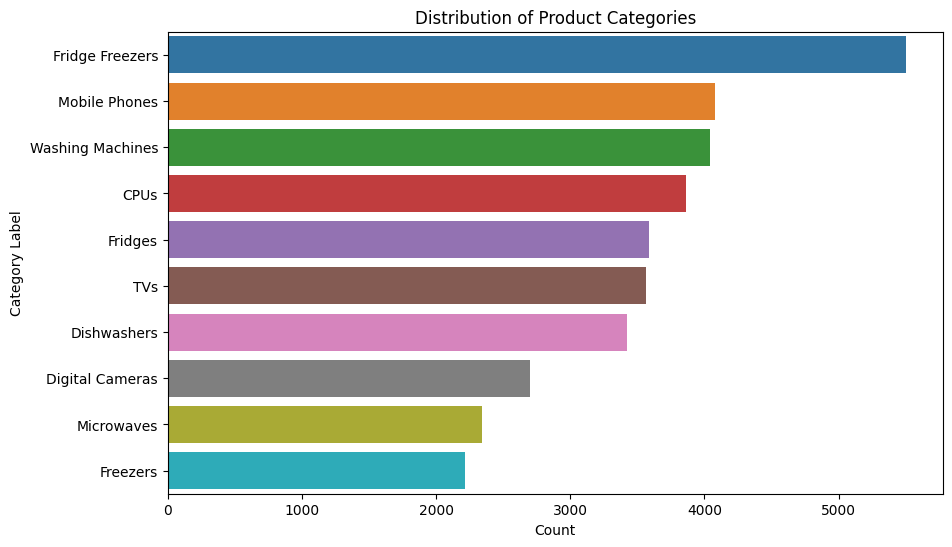

In [9]:
# Distribution of Categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category Label', data=data, order=data['Category Label'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xlabel('Count')
plt.ylabel('Category Label')
plt.show()

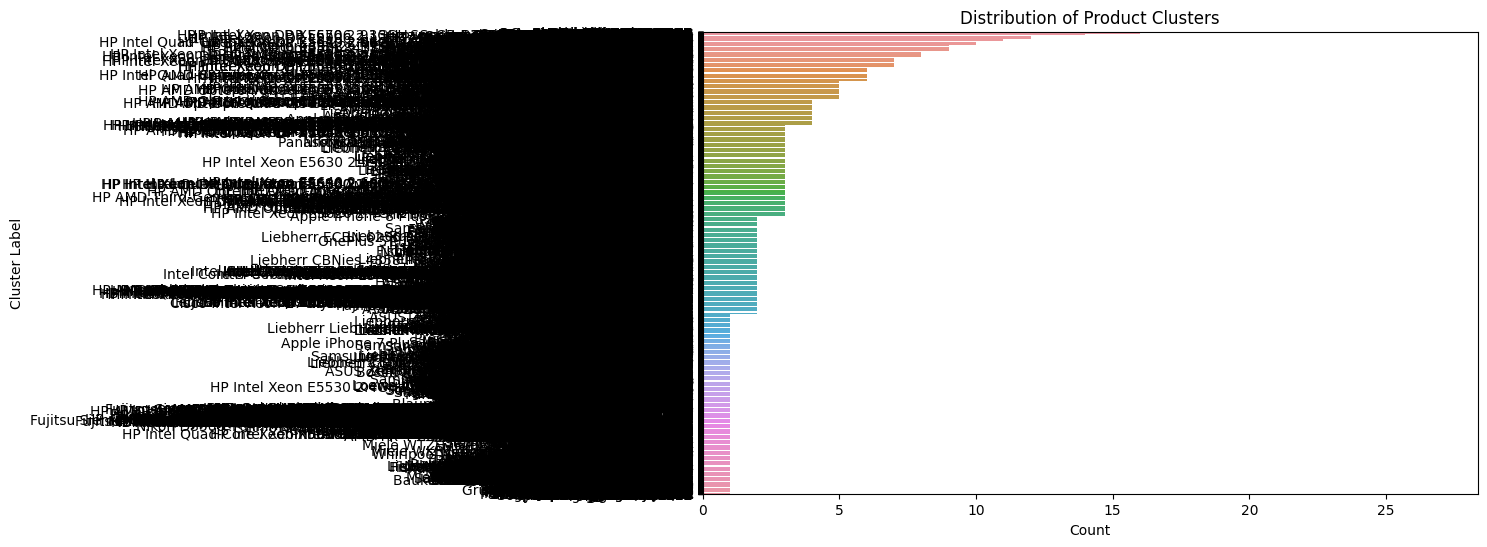

In [10]:
# Distribution of Clusters
plt.figure(figsize=(10, 6))
sns.countplot(y='Cluster Label', data=data, order=data['Cluster Label'].value_counts().index)
plt.title('Distribution of Product Clusters')
plt.xlabel('Count')
plt.ylabel('Cluster Label')
plt.show()

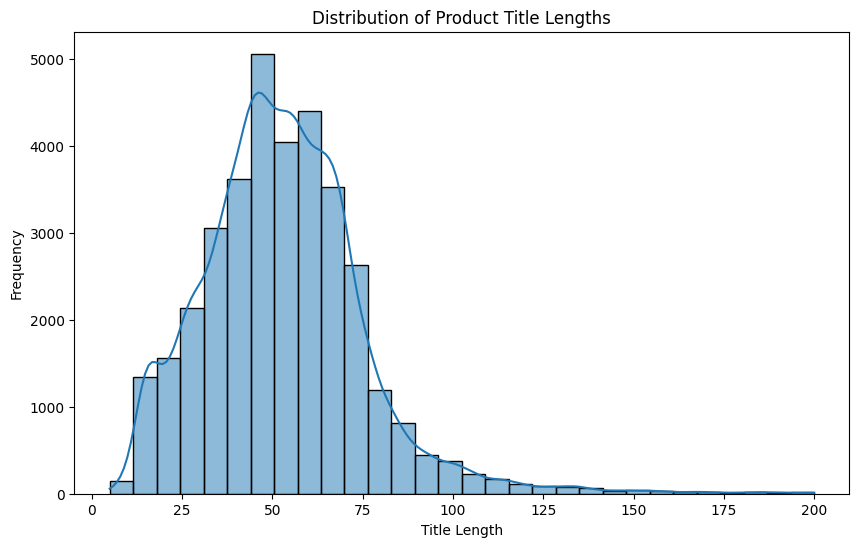

In [11]:
# Analyze Product Titles Length
data['Title Length'] = data['Product Title'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data['Title Length'], bins=30, kde=True)
plt.title('Distribution of Product Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Merchant Analysis
merchant_counts = data['Merchant ID'].value_counts()
print("\nTop 10 Merchants with Most Products:")
print(merchant_counts.head(10))


Top 10 Merchants with Most Products:
3      2547
6      1591
298    1523
31     1350
119    1239
7      1204
17     1193
293    1177
294    1000
301     901
Name: Merchant ID, dtype: int64


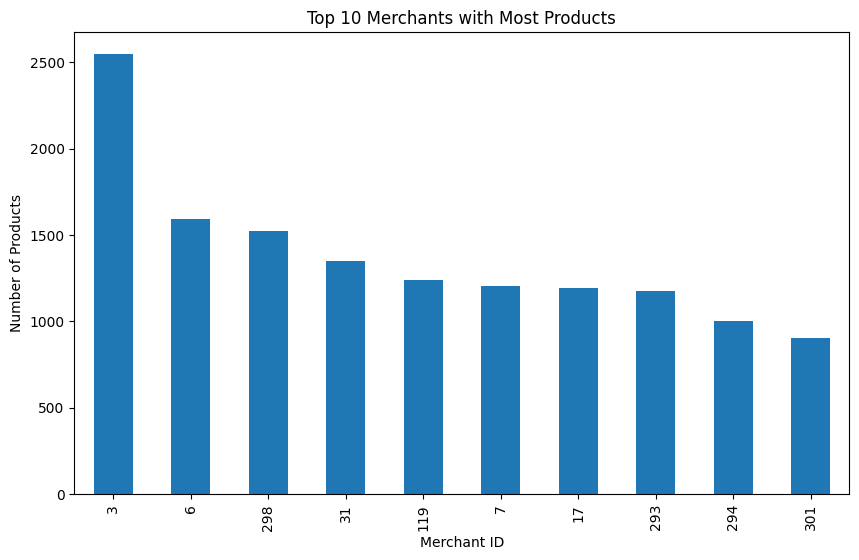

In [13]:
# Visualize top merchants
plt.figure(figsize=(10, 6))
merchant_counts.head(10).plot(kind='bar')
plt.title('Top 10 Merchants with Most Products')
plt.xlabel('Merchant ID')
plt.ylabel('Number of Products')
plt.show()

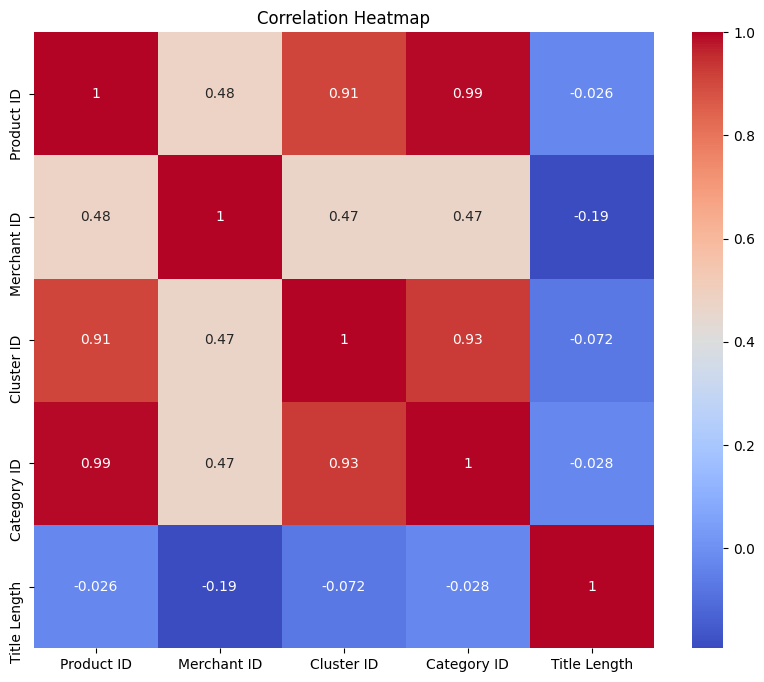

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Insights based on clusters
print("\nCluster-wise Summary:")
print(data.groupby('Cluster Label').size().sort_values(ascending=False))


Cluster-wise Summary:
Cluster Label
Canon IXUS 185                                     27
Canon PowerShot SX730 HS                           24
Samsung UE49NU7100                                 24
Samsung UE75NU7100                                 23
Canon IXUS 285 HS                                  23
                                                   ..
Intel Xeon E5-1428L v3 2GHz Tray                    1
Intel Xeon E5-1428L v2 2.2GHz Tray                  1
Intel Xeon E5 2690 2.9Ghz Box                       1
Intel Xeon E5 2680 2.7Ghz Box                       1
Intel Xeon X3210 2.13GHz Socket 775 1066MHz Box     1
Length: 12849, dtype: int64


In [16]:
# Prepare data for product classification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [17]:
# Extract features and labels
X = data['Product Title']
y = data['Category Label']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [20]:
# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_tfidf, y_train);

In [21]:
# Make predictions
y_pred = classifier.predict(X_test_tfidf)
print(y_pred)

['Fridges' 'TVs' 'Mobile Phones' ... 'CPUs' 'TVs' 'TVs']


In [22]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
                  precision    recall  f1-score   support

            CPUs       1.00      0.99      1.00       771
 Digital Cameras       1.00      0.99      1.00       542
     Dishwashers       0.90      0.95      0.92       662
        Freezers       0.96      0.92      0.94       439
 Fridge Freezers       0.93      0.92      0.93      1115
         Fridges       0.91      0.90      0.90       728
      Microwaves       0.97      0.96      0.96       469
   Mobile Phones       0.97      0.99      0.98       818
             TVs       0.97      0.98      0.98       723
Washing Machines       0.97      0.94      0.95       796

        accuracy                           0.95      7063
       macro avg       0.96      0.96      0.96      7063
    weighted avg       0.96      0.95      0.96      7063


Accuracy Score:
0.9549766388220303


In [23]:
# Save the TF-IDF model and classifier for future use
import joblib

joblib.dump(tfidf, 'tfidf_model.pkl')
joblib.dump(classifier, 'product_classifier.pkl')

print("\nTF-IDF model and classifier have been saved.")


TF-IDF model and classifier have been saved.


In [24]:
# Test a sample product title
sample_product_title = ['Apple iPhone 12 Pro Max 256GB']
sample_product_title_tfidf = tfidf.transform(sample_product_title)
sample_product_category = classifier.predict(sample_product_title_tfidf)
print(f"\nPredicted Category for the sample product title: {sample_product_category[0]}")


Predicted Category for the sample product title: Mobile Phones
